# X-Risk Estimation

In this notebook we create the data from the [Exploratory Data Analysis]('./x-risk-eda.ipynb') (EDA) and create a survival model. 

From other notebooks, we obtained weighted risk estimates based on estimates from multiple people. But what can we do with these probabilities? A probability, though sometimes useful to highlight how an event is more likely to occur than another, is still somewhat, vague. 

## Motivation

Matters such as the extinction risk of humans are kind of a big deal, I find. And what these estimates do is reduce those complex matters to a number, a number that is comparable to the odds of your favorite team, or a horse winning a race. It might trivialize the odds, and it might give us a false sense of security.

These estimates are good for us to gauge our current risk of peril, but I find that looking at them in the context of humanity's potential future would be a good way to put things into perspective. It might give us a much-needed sense of urgency to reduce existential risk, and it might help us to prioritize.

So this is a little experiment to play around with the math, and see what comes out, maybe an interesting insight, and if not, at least it was fun.

This is mostly purely a mathematical game, we take some numbers in, do some computations and get a different set of numbers out. But it might end up being at least somewhat illustrative regarding our situation, and it might point out to the most important steps for humanity to take now. 

## The Problem

Given that [humanity's potential to flourish is so incredibly vast](https://thoughtroamer.substack.com/p/the-extinction-game), what are our odds of fulfilling that potential? What are the odds that we peril before reaching that potential?

We want to embark in an exploration into existential risk. Particularly, we want to investigate how long we can expect humanity to still be around, given different existential risk levels. We can, of course, use current existential risk estimates, and see where that takes us, and we can also use varying levels, to see what would happen if we let them increase or if we get to work and successfully reduce them.

So the goal is simple, we'll come up with different models for humanity's survival, and we use current X-Risk estimates to investigate how long we'd be expected to last given those risk levels. We can also ask how much risk we should tolerate, given our vast potential. And we might also investigate how our "life expectancy" might change by parting from different X-Risk levels.

In [20]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as srs
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Setup seaborn
srs.set_theme()

## The Extinction Game

Here, we will try to model the problem in different ways, starting from simple models to more complex ones.

Broadly the whole modeling is based on what I call "The Extinction Game" - yes, it's a dramatic subject. It's a game that involves the whole of humanity. In it, humanity *wins* and goes on for a long time in a desirable state of flourishing, thus fulfilling its potential. Or it *loses*, destroying its potential to flourish.

What exactly means to lose is debatable; it could either mean civilization's collapse, or extinction. However, the most generic scenario is one where *humanity's potential to flourish* is destroyed. This could be either due to full-fledged extinction, or it could be the establishment of an ultra stable dystopia that lasts for millions of years, or civilization's collapse without the ability to recover, but not necessarily the extinction of Homo Sapiens.

For brevity and clarity I'll use the term "extinction" to refer to the *losing* scenarios, even though it isn't necessarily synonymous with extinction.


# Level 1 - Disjoint Events with Constant Total Risk

This is the simplest model. In it, humanity's existential risk is modeled as a probability cascade, where the extinction game is played every century, and every century is independent - meaning that the outcome in one century doesn't affect the game in other centuries. We also use a constant figure for total risk. 

Though this model has the downside of modeling each century as independent - which is not the case, and clearly history has an important impact on future outcomes - it could serve as a "business as usual" scenario, where risk levels are maintained, reflecting a lack of effort to actively reduce them, or just enough effort to not let them increase.

To describe the problem we introduce the following events and expressions:

- $E$: Extinction in a randomly chosen century
- $E_n$: Extinction after $n$ centuries
- $S$: Survival in a randomly chosen century
- $S_n$: Survival after $n$ centuries
- $P(E)$: Probability of extinction in a randomly chosen century
- $P(S)$: Probability of survival in a randomly chosen century
- $P(E_n)$: Probability of extinction after $n$ centuries
- $P(S_n)$: Probability of survival after $n$ centuries

We can establish the relationships between $P(E)$, $P(S)$, $P(E_n)$, and $P(S_n)$.

First we assume that $P(S)$ and $P(E)$ are complementary and mutually exclusive. There either is or isn't an extinction event in a randomly chosen century. And similarly, after $n$ centuries, either there is or there isn't an extinction event, so $P(E_n)$, and $P(S_n)$ are also mutually exclusive and complementary.

$$
\begin{aligned}
P(S) &= 1 - P(E) \\
P(S_n) &= 1 - P(E_n)
\end{aligned}
$$

To model the survival probability after $n$ centuries, we can just multiply the survival probability $n$ times, or raise it to the power of $n$:

$$
\begin{aligned}
P(S_n) &= P(S)^n \\
P(S_n) &= \left[1 - P(E) \right]^n
\end{aligned}
$$

We've now modeled the survival probability in a very simple way. How does our survival likelihood look like when using current X-Risk estimates?

In [21]:
# Load x-risk estimate data.
df = pd.read_csv('./data/processed_estimates/summary_estimates.csv')
df.describe()

,mean,weighted_mean,confidence_weight_mean,median,std,count,q1,q3,iqr,geometric_mean,weighted_geometric_mean
count,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000
mean,0.054429,0.053682,0.801167,0.031587,0.069163,8.100000,1.190801e-02,0.077932,0.066024,0.020237,0.021596
std,0.065556,0.065715,0.094558,0.048928,0.072112,5.896327,1.810331e-02,0.101514,0.088646,0.029553,0.031875
min,0.000979,0.000881,0.666667,0.000001,0.002549,1.000000,5.650000e-07,0.000046,0.000000,0.000003,0.000002
25%,0.005758,0.005892,0.728535,0.003624,0.010398,4.000000,6.600000e-04,0.009813,0.007827,0.002068,0.001831
50%,0.022475,0.021854,0.786184,0.008675,0.022473,7.500000,2.366250e-03,0.022512,0.019150,0.004760,0.004905
75%,0.103197,0.101102,0.875000,0.025462,0.152058,10.500000,1.662500e-02,0.158375,0.142187,0.021525,0.021505
max,0.161579,0.160972,0.928571,0.142000,0.170602,19.000000,5.000000e-02,0.250000,0.200000,0.080536,0.084158


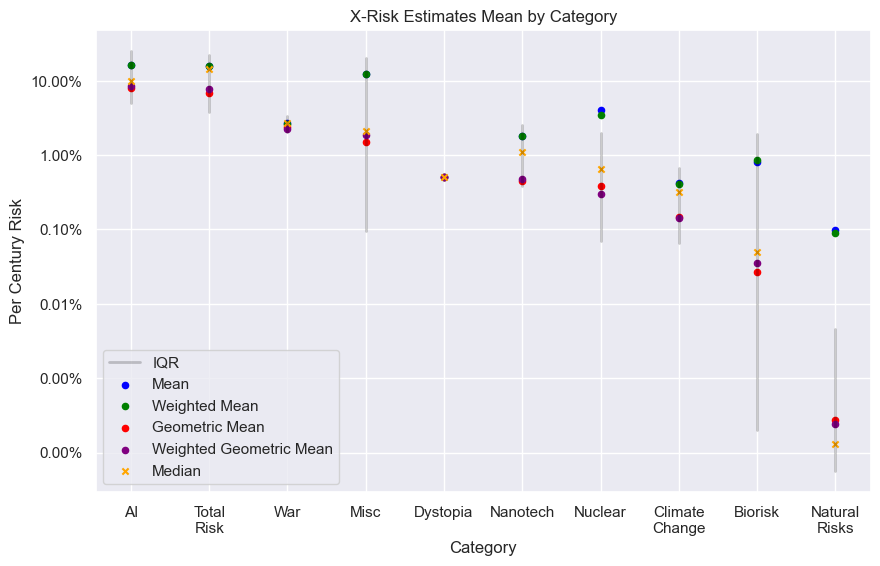

In [29]:
df_sorted = df.sort_values(by='geometric_mean', ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))

for i, row in df_sorted.iterrows():
  ax.plot([row['category_alias'], row['category_alias']], [row['q1'], row['q3']], color='black', linewidth=2, label='IQR' if i == 0 else '', alpha=0.2)

df_sorted.plot(kind='scatter', x='category_alias', y='mean', color='blue', label='Mean', ax=ax)
df_sorted.plot(kind='scatter', x='category_alias', y='weighted_mean', color='green', label='Weighted Mean', ax=ax)
df_sorted.plot(kind='scatter', x='category_alias', y='geometric_mean', color='red', label='Geometric Mean', ax=ax)
df_sorted.plot(kind='scatter', x='category_alias', y='weighted_geometric_mean', color='purple', label='Weighted Geometric Mean', ax=ax)
df_sorted.plot(kind='scatter', x='category_alias', y='median', color='orange', label='Median', ax=ax, marker='x')

ax.set_yscale('log')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
ax.set_title('X-Risk Estimates Mean by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Per Century Risk')

# Combine legends
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower left')
plt.show()


In the notebook where we performed the EDA, we estimated weighted arithmetic and geometric means. Since the data has a wide spread, we'll use the weighted geometric means, since they are less affected by outliers, and they're mostly within the interquartile range (IQR).

In [23]:
# Implement simple constant risk model
def probability_of_survival_after_n_centuries(n, xrisk):
    """
    Calculate the probability of survival after a given number of centuries, 
    assuming a constant annual existential risk.

    Parameters:
    n (int): The number of centuries.
    xrisk (float): The annual existential risk (probability of extinction per year).

    Returns:
    float: The probability of survival after n centuries.
    """
    return (1 - xrisk) ** n

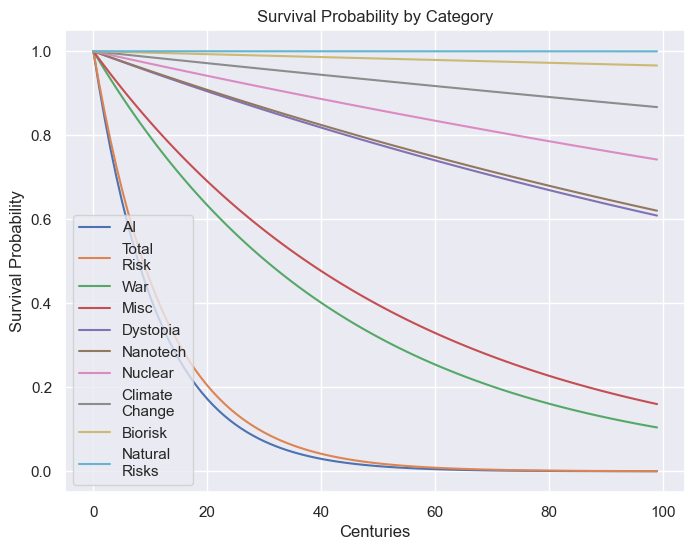

In [56]:
# Plot the probability of survival after 10 centuries for the different risk categories.
n = np.arange(0, 100)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the survival probability for each category
survival_probs_100 = []
for index, data in df_sorted.iterrows():
    survival_prob = probability_of_survival_after_n_centuries(n, data['weighted_geometric_mean'])
    survival_probs_100.append((data['category_alias'], survival_prob[-1]))
    category = data['category_alias']
    ax.plot(n, survival_prob, label=category)

ax.set_ylabel('Survival Probability')
ax.set_xlabel('Centuries')
ax.set_title('Survival Probability by Category')

ax.legend(loc='lower left')
plt.show()

In [60]:
for prob in survival_probs_100:
    print(f"P(S_100) for {prob[0].replace('\n', ' ')}: {prob[1]:.2%}")

P(S_100) for AI: 0.02%
P(S_100) for Total Risk: 0.04%
P(S_100) for War: 10.44%
P(S_100) for Misc: 16.01%
P(S_100) for Dystopia: 60.88%
P(S_100) for Nanotech: 62.04%
P(S_100) for Nuclear: 74.22%
P(S_100) for Climate Change: 86.71%
P(S_100) for Biorisk: 96.61%
P(S_100) for Natural Risks: 99.98%


## Observations on Survival Probability of Disjoint Centuries

We can see that broadly, the risk categories are grouped in at least three categories. There are the x-risks with the lowest estimates Dystopia, Nanotech, Nuclear, Climate Change, Biorisk, and Natural Risk, which result in the highest survival probabilities after 100 centuries - or 10,000 years, from about 60 to almost 100%.

War and Misc show survival probabilities of 10 and 16%, while AI and Total Risk give us almost zero chance to still be around for 10.000 years.

One very important observation is that total risk is *lower* than AI risk, which doesn't really make any sense. How can be the total risk, which is supposed to contain all other risks, lower than one of its constituents? This is a strong indication of uncertainty among the estimators. Total risk should be at least as high as the highest risk.

Below a few other important points:

1. The clustering is notable:
- High survival probability (60-100%): Natural risks through nuclear risks
- Medium survival probability (10-20%): War and miscellaneous risks  
- Near-zero survival probability (<1%): AI and total risk

2. Interesting patterns:
- Total risk closely tracks AI risk, suggesting AI dominates overall existential risk estimates
- Natural risks show remarkably high survival probability, reflecting confidence in our ability to handle known threats

3. Potential biases to consider:
- Newer risks (AI, nanotech) may have wider uncertainty ranges than traditional risks
- Historical data availability affects confidence - natural risks are better understood than emerging technologies
- Interdependencies between risks aren't captured (e.g., how war might affect AI development)

4. Methodological note:
The exponential decay in survival probability over centuries assumes risks are independent over time, which may not hold true. Some risks might decrease with technological advancement while others increase.

The stark difference between AI/total risk and other categories suggests experts view artificial intelligence as uniquely challenging compared to other existential risks humanity has faced.


## So, how long?

We're still talking about probabilities. We actually wanted to estimate how long we can expect to be around. So we might need a different calculation, especially one that takes into consideration humanity's long-term potential.

We can now investigate, given an existential risk level, how long we can be around with a certain probability. For instance, we can ask how long can we expect to be around with a probability of at least 90%? The probability to still be around we can choose relatively arbitrarily, so $P(S_n)$ becomes a constant, and we could solve for $n$, the number of centuries we expect to be around.

$$
\begin{aligned}
P(S_n) &= P(S)^n \notag \\
\log(P(S_n)) &= n \cdot \log(P(S)) \notag \\
n &= \frac{\log[P(S_n)]}{\log[P(S)]} \notag \\
n &= \frac{\log[P(S_n)]}{\log[1 - P(E)]}
\end{aligned}
$$

What's then the life expectancy if we wanted a probability of survival to remain higher than, say 90, 99, and 99.9%?

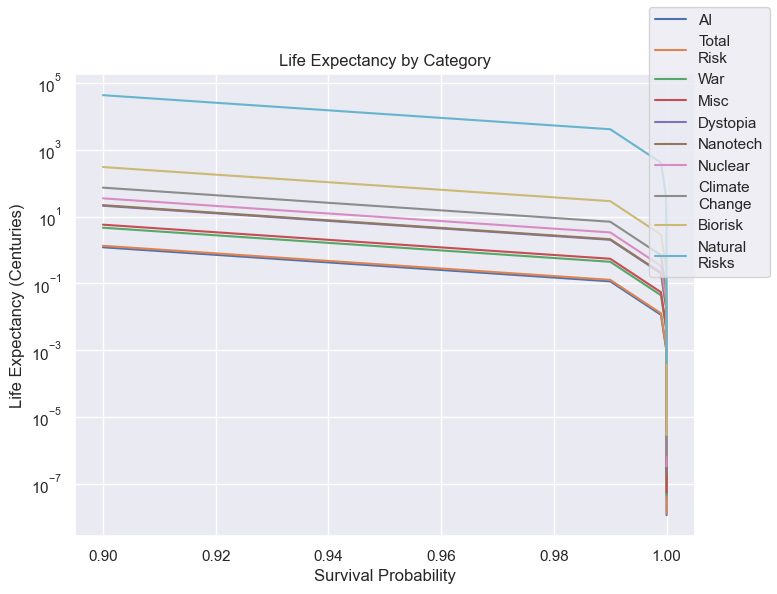

In [96]:
def compute_life_expectancy(xrisk, survival_probability):
    """
    Calculate the life expectancy in centuries given an annual existential risk and a survival probability.

    Parameters:
    xrisk (float): The annual existential risk (probability of extinction per year).
    survival_probability (float): The probability of survival after n centuries.

    Returns:
    float: The life expectancy in centuries.
    """

    return np.log(survival_probability) / np.log(1 - xrisk)

survival_probabilities = [1 - 1/np.pow(10, x) for x in range(1, 10)]

# Plot the life expectancy for the different risk categories.
fig, ax = plt.subplots(figsize=(8, 6))
for index, data in df_sorted.iterrows():
    life_expectancy = compute_life_expectancy(data['weighted_geometric_mean'], survival_probabilities)
    ax.plot(survival_probabilities, life_expectancy, label=data['category_alias'])

ax.set_yscale('log')
ax.set_ylabel('Life Expectancy (Centuries)')
ax.set_xlabel('Survival Probability')
ax.set_title('Life Expectancy by Category')

fig.legend()

## Observations regarding life expectancy

The life expectancy plot reveals several insights:

1. Scale and Grouping:
- Natural risks show highest life expectancy (~10^4 centuries)
- Middle cluster (biorisk through nuclear) around 10-100 centuries
- Lowest group (AI/total risk) below 1 century
- Log scale emphasizes the dramatic differences between categories

2. Probability Relationship:
- Sharp drop-off near 100% survival probability for all categories
- More gradual decline at lower probabilities
- Natural log relationship between survival probability and expected lifespan

3. Critical Implications:
- Even small differences in per-century risk compound dramatically
- AI and total risk estimates suggest <1 century expected survival at high confidence
- Traditional risks (natural disasters, nuclear) allow for much longer timescales

4. Methodological Note:
The steep decline at high probabilities suggests getting very high confidence in long-term survival requires dramatic risk reduction across all categories.

## Summary for Probability Cascade Model

Our initial exploration using a simple probability cascade model has revealed some insights about humanity's potential future. By treating each century as an independent roll of the dice with fixed odds of survival, we've seen how different existential risks could affect our long-term prospects.

The results paint a sobering picture: while we appear relatively well-equipped to handle traditional threats like natural disasters (with survival probabilities extending to tens of thousands of years), emerging technologies — particularly artificial intelligence — present a more immediate challenge. The model suggests that under current AI risk estimates, achieving high-confidence long-term survival becomes remarkably difficult, with timescales compressed to less than a century.

It is also notable that, as mentioned above, total risk is lower than AI risk, which doesn't really make too much sense, since the total risk should be at least as high as the highest 'isolated' risk.

However, this simple model has clear limitations. Real-world risks don't remain static, nor do they operate independently. As we develop new technologies, some risks might decrease while others emerge or intensify. The decisions we make today could dramatically alter the risk landscape of tomorrow.

This brings us to our next steps. We'll explore two more sophisticated approaches to modeling humanity's future:
First, we'll develop a dynamic risk tree model that captures how risks evolve over time. This will help us understand how technological progress and human decisions might create branching paths toward different futures, some safer than others.

Then, we'll investigate how different risks interact through a conditional probability model. Using our existing work on risk correlations, we'll examine how reducing one type of risk might affect others—for instance, how advancing AI safety might influence other technological risks, or how global cooperation on one challenge might help address others.
These more complex models should give us a richer understanding of the challenges we face and the potential paths toward securing humanity's long-term flourishing.

# X-Risk Tree

In this model we explore the future of humanity using a probability tree. The tree allows us to explore what would happen to humanity if the risk increases, decreases, or remains more or less constant through the centuries.

We start from our current century, at current risk levels. In the next century, X-Risk can increase or decrease by a fixed amount $\alpha$. We now have two possible worlds, one in which the risk increases, and one in which the risk decreases, in both cases by a factor $\alpha$. These two worlds will in turn split again into four possible worlds, one in which the risk has increased twice, one in which the risk has decreased twice, and two worlds where it has increased and decreased once, remaining more or less constant.

After building the X-Risk tree, we can run a Monte-Carlo simulation to find out what portion of civilizations are still alive after $n$ centuries.

In [257]:
def get_xrisk_tree_shape(n):
    return n, 2**(n-1)

# First we'll build the probability tree as a matrix
def build_xrisk_tree(n, initial_risk, alpha):

    # Validate the inputs
    assert 0 <= alpha <= 1
    assert 0 <= initial_risk <= 1
    assert n > 0

    # Get the dimensions of the matrix
    rows, cols = get_xrisk_tree_shape(n)

    print(f"Rows: {rows}, Cols: {cols}")
    
    # Initialize the matrix
    tree = np.zeros((rows, cols))
    tree[:] = np.nan
    
    # Set the initial risk
    tree[0, :] = initial_risk

    # Fill the matrix, starting from the second row, since the first row only has the root element already filled.
    for i in range(1, rows):
        # Compute number of children in current row
        n_children = 2**i
        n_cells_per_child = cols / n_children

        # Iterate through the children in the current row
        for child_col in range(n_children):

            # Since each child can have multiple elements, compute the range of elements that represent this child.
            child_col_range_start = int(child_col*n_cells_per_child)
            child_col_range_end = int(child_col_range_start + n_cells_per_child)

            # Get the parent for the current cell, it's always the cell above.
            parent_col = int(child_col * n_cells_per_child)
            parent = tree[i-1, parent_col]

            # Determine the risk direction for this child, should it increase (1) or decrease (-1)?
            direction = 1
            if child_col % 2 == 1:
                direction = -1

            risk = parent + direction * alpha

            # Cap the risk levels
            if risk > 1:
                risk = 1
            if risk < 0:
                risk = 0

            # Set risk level

            # print(f'Cols range: {cols_range_start} to {cols_range_end}')
            tree[i, child_col_range_start:child_col_range_end] = np.float16(risk)                

    return tree


In [258]:
def run_survival_simulation(tree):
    # Create a matrix of random numbers
    random_matrix = np.random.random(tree.shape)
    
    # If the random number in the matrix is higher than the risk in the x-risk tree, then we assume that that civilization survived that period.
    survival_matrix = tree <= random_matrix
    survival_matrix = survival_matrix.astype(int)
    
    # Check each column and see if any century was lost before the last
    for j in range(survival_matrix.shape[1]):
        # A branch in the tree is represented by each whole column, fetch it.
        branch = survival_matrix[:, j]

        # Find any zeros in the branch
        zeros = np.where(branch == 0)[0]

        if zeros.size == 0:
            continue
        
        # Collect the index of the first zero
        first_zero = zeros[0]

        # Set all entries after the first zero to zero, meaning that after one extinction event, it's game over.
        branch[first_zero:] = 0

        # Replace the branch in the survival matrix.
        survival_matrix[:, j] = branch

    # Return true as ones and false as zeros
    return survival_matrix


In [259]:
# Run the simulation many times
n_simulations = 1000
tree = build_xrisk_tree(4, 0.1, 0.01)
tree

Rows: 4, Cols: 8


array([[0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       ],
       [0.10998535, 0.10998535, 0.10998535, 0.10998535, 0.09002686,
        0.09002686, 0.09002686, 0.09002686],
       [0.11999512, 0.11999512, 0.09997559, 0.09997559, 0.10003662,
        0.10003662, 0.08001709, 0.08001709],
       [0.13000488, 0.10998535, 0.10998535, 0.08996582, 0.11004639,
        0.09002686, 0.09002686, 0.07000732]])

In [260]:
results = np.zeros((n_simulations, tree.shape[0], tree.shape[1]))

for i in range(n_simulations):
    results[i] = run_survival_simulation(tree)

# Add up the results to get the number of times each cell survived
survival_counts = np.sum(results, axis=0)
survival_counts

array([[906., 899., 883., 895., 911., 904., 893., 898.],
       [806., 794., 799., 791., 820., 808., 812., 815.],
       [716., 689., 705., 719., 744., 718., 740., 750.],
       [607., 618., 608., 665., 664., 651., 677., 707.]])

In [261]:
# We're interested in the last row, which reflects how many civilizations survived until the end
survivors = survival_counts[-1, :]
survivors

array([607., 618., 608., 665., 664., 651., 677., 707.])

This is a computationally expensive calculation, since the number of items in the matrix increases exponentially with the number of generations we're looking at. If we had about 10GB of ram at our disposal, how many generations can we calculate? We need a matrix that fits into those 10GB of data.

In [262]:
import numpy as np


def calculate_max_generations(available_ram_gb, n_simulations):
    """
    Calculate maximum number of generations possible given RAM constraints.
    
    Parameters:
    available_ram_gb (float): Available RAM in gigabytes
    n_simulations (int): Number of simulation runs
    
    Returns:
    int: Maximum number of generations possible
    """
    bytes_per_float = 2  # np.float16
    bytes_to_gb = 1024**3
    available_bytes = available_ram_gb * bytes_to_gb

    def memory_required(n_generations):
        rows = n_generations
        cols = 2**(n_generations-1)
        # Memory for tree matrix
        tree_size = rows * cols * bytes_per_float
        # Memory for results array
        results_size = n_simulations * rows * cols * bytes_per_float
        # Memory for random matrix
        random_size = rows * cols * bytes_per_float
        # Memory for survival matrix
        survival_size = rows * cols * bytes_per_float

        return tree_size + results_size + random_size + survival_size

    # Binary search to find maximum generations
    left, right = 1, 20  # Start with reasonable bounds
    while left <= right:
        mid = (left + right) // 2
        if memory_required(mid) <= available_bytes:
            left = mid + 1
        else:
            right = mid - 1

    return right


# Example usage
ram_gb = 10
n_sims = 1000
max_gens = calculate_max_generations(ram_gb, n_sims)
print(f"Maximum generations with {ram_gb}GB RAM and {n_sims} simulations: {max_gens}")

Maximum generations with 10GB RAM and 1000 simulations: 19


### Correlated Existential Risks

### Definitions

Let:
- $x_i(t)$ = risk from source $i$ in period $t$
- $X(t)$ = total existential risk in period $t$
- $\rho_{ij}$ = correlation coefficient between risks $i$ and $j$
- $n$ = number of risk sources (6 in our case)
- $\Sigma$ = correlation matrix with entries $\rho_{ij}$

Our risk sources are:
1. AI ($x_1$)
2. Nuclear ($x_2$)
3. Bio ($x_3$)
4. Natural ($x_4$)
5. Climate ($x_5$)
6. Dystopia ($x_6$)

## Base Risk Values (by 2100)
$x_1 = 0.10$ (AI)
$x_2 = 0.01$ (Nuclear)
$x_3 = 0.025$ (Bio)
$x_4 = 0.0001$ (Natural)
$x_5 = 0.001$ (Climate)
$x_6 = 0.05$ (Dystopia)

## Correlation Matrix
$\Sigma = \begin{pmatrix} 
1.0 & 0.3 & 0.4 & -0.3 & 0.2 & 0.7 \\
0.3 & 1.0 & 0.6 & 0.2 & 0.6 & 0.8 \\
0.4 & 0.6 & 1.0 & 0.4 & 0.5 & 0.7 \\
-0.3 & 0.2 & 0.4 & 1.0 & 0.8 & 0.5 \\
0.2 & 0.6 & 0.5 & 0.8 & 1.0 & 0.7 \\
0.7 & 0.8 & 0.7 & 0.5 & 0.7 & 1.0
\end{pmatrix}$

## Single Period Risk

For independent risks:
$X_{ind}(t) = 1 - \prod_{i=1}^n (1 - x_i(t))$

For correlated risks using a Gaussian copula:
$X(t) = 1 - C(1-x_1(t), 1-x_2(t), ..., 1-x_n(t); \Sigma)$

where $C$ is the Gaussian copula:
$C(u_1,...,u_n;\Sigma) = \Phi_\Sigma(\Phi^{-1}(u_1),...,\Phi^{-1}(u_n))$

Here:
- $\Phi_\Sigma$ is the multivariate normal CDF with correlation matrix $\Sigma$
- $\Phi^{-1}$ is the inverse of the standard normal CDF

## Multi-Period Survival

Probability of survival through $T$ periods:
$P(\text{survival through }T\text{ periods}) = \prod_{t=1}^T (1 - X(t))$

Expected survival time:
$E[T] = \sum_{t=1}^{\infty} t \cdot P(\text{survival exactly }t\text{ periods})$

where:
$P(\text{survival exactly }t\text{ periods}) = (1-X(t))^{t-1} \cdot X(t)$